University of Michigan - ROB 101 Computational Linear Algebra

# Second-Order Unconstrained Optimization 

In an optimization problem, we would like to minimize (or maximize) an objective function over its input (called *design* or *decision variables*). In particular, here we work with an objective function of the type $f:\mathbb{R}^m \to \mathbb{R}$ and our decision variables are $m$-vectors, i.e., $x\in \mathbb{R}^m$.

## Damped Newton-Raphson Algorithm

We use a step size $0 < \alpha < 1$ to control each update size (damped Newton).

1. Start with an initial guess $x_0$ ($k=0$).
2. Evaluate gradient $\nabla f(x_k)$. If $\lVert \nabla f(x_k) \rVert = 0$, then the algorithm is converged.
3. Evaluate Hessian $H_k$. Solve the linear system $H_k \Delta x_k = -\nabla f(x_k)$.
4. Update the decision variable via $x_{k+1} = x_k + \alpha \Delta x_k$.
5. Repeat (go back to 2) until convergence.

## Classification of Critical Points

- The **critical points** of fucntion $f$ are where $\nabla f = 0$ or $\nabla f$ does not exist. 
- Therefore, any local extrema is a critical point (necessary condition). 
- Not all critical points are local extrema. We call these points saddle points.

![Saddle Point](https://upload.wikimedia.org/wikipedia/commons/1/1e/Saddle_point.svg)

## Classification of Critical Points using $\det H$ and Eigenvalues of $H$

We wish to classify the roots of the gradient, i.e., solutions of $\nabla f = 0$, using the Hessian matrix (2nd derivatives). 

1. If $\det H \neq 0$:
    1. A local minimum if all eigenvalues of $H$ are strictly positive.
    2. A local maximum if all eigenvalues of $H$ are strictly negative.
    3. A saddle point if eigenvalues of $H$ have mixed signs.
3. If $\det H = 0$, then the test is inconclusive.

### Example 1

Consider the quadratic function $f(x) = x^T A x = \begin{bmatrix} x_1 & x_2 \end{bmatrix} \begin{bmatrix} 2 & -1 \\ -1 & 2 \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} = 2x_1^2 + 2x_2^2 - 2 x_1 x_2$. We want to find $x$ that minimizes $f(x)$.

\begin{equation*}
   x^* = \arg \min_{x \in \mathbb{R}^2} f(x)
\end{equation*}
Clearly, the answer is $\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \end{bmatrix}$. In this case, we can plot the function.

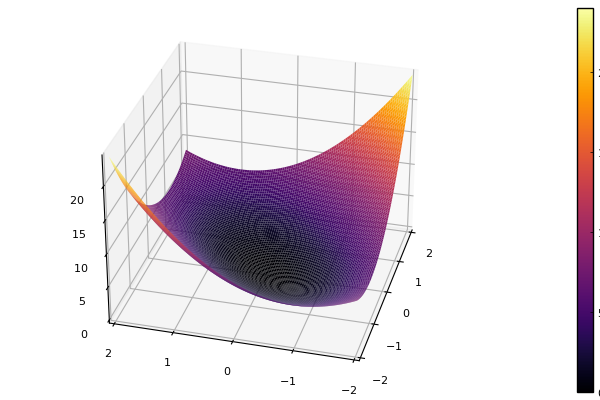

In [1]:
using Plots
pyplot()
x1 = LinRange(-2,2,101); x2 = LinRange(-2,2,101);
f(x1,x2) = 2 * x1^2 + 2 * x2^2 - 2 * x1 * x2;
plot(x1,x2,f,st=:surface,camera=(-75,30))

We can also plot the contours of the objective function. It is much easier to see the minimum at the origin using this plot. 

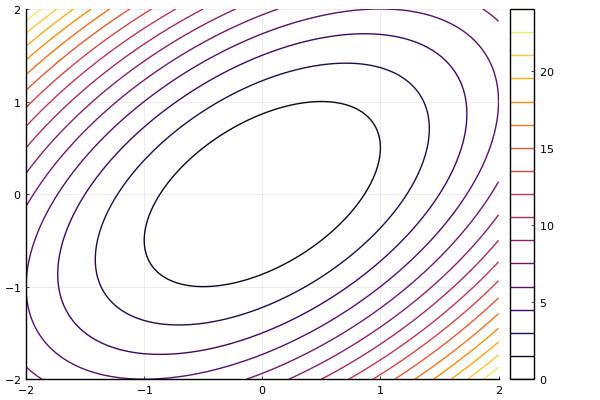

sys:1: UserWarning: The following kwargs were not used by contour: 'label'


In [2]:
using Plots
pyplot()
#x1 = LinRange(-2,2,101); x2 = LinRange(-2,2,101);
f(x1,x2) = 2 * x1^2 + 2 * x2^2 - 2 * x1 * x2;
plot(x1,x2,f,st=:contour,camera=(-30,30))

Next, we implemnt a gradient descent alorithm to find the minimum. We can start from an initial guess such as $x_0=\begin{bmatrix} -1\\2 \end{bmatrix}$.

In [1]:
#using Pkg
#Pkg.add("ForwardDiff")
using LinearAlgebra
using ForwardDiff


function f1(x) # f(x) = x^T A x
    A = [2 -1; -1 2];
    return x' * A * x
end

f1 (generic function with 1 method)

In [2]:
x0 = [-1.; 2.]; # initial guess
α = 0.99; # step size
delta = 1e-9; # set a convergence threshold
# set a max iteration so we don't get stuck in the loop forever!
MAX_ITER = 100; 
N = 1; # counter for iteration
x = x0; # root variable
myfunc = f1;
while N < MAX_ITER
    g = ForwardDiff.gradient(myfunc, x); # evaluate gradient at current guess
    H = ForwardDiff.hessian(myfunc, x); # evaluate Hessian matrix at current guess
    detH = det(H);
    if abs(det(H)) < delta
            println(" Insufficient information to proceed. Newton-Raphson method did not converge; Hessian is singular.")
            break
    end
    if norm(g) < delta
        if abs(det(H)) > delta
            if all(sign.(eigen(H).values) .> 0)
                println("Converged to a local minimum at iteration: N = ", N)
            elseif all(sign.(eigen(H).values) .< 0) 
                println("Converged to a local maximum at iteration: N = ", N)
            else
                println("Converged to a saddle point at iteration: N = ", N)
            end
        end
        break
    else
        dx = -H \ g; # solve the linear system
        x += α * dx; # x_{k+1} = x_k - step * H^{-1} * grad
    end
    # print the output at each iteration
    println("f(x): ", round(myfunc(x),digits=10), "\t norm(grad): ", round(norm(g),digits=10))
    println("N: ", N, "\t\t x: ", round.(x,digits=10))
    println("--------------------------------------------")
    N += 1;
end

println("f(x): ", myfunc(x), "   norm(grad): ", norm(ForwardDiff.gradient(myfunc, x)), "   x: ", x)

f(x): 0.0014	 norm(grad): 12.8062484749
N: 1		 x: [-0.01, 0.02]
--------------------------------------------
f(x): 1.4e-7	 norm(grad): 0.1280624847
N: 2		 x: [-0.0001, 0.0002]
--------------------------------------------
f(x): 0.0	 norm(grad): 0.0012806248
N: 3		 x: [-1.0e-6, 2.0e-6]
--------------------------------------------
f(x): 0.0	 norm(grad): 1.28062e-5
N: 4		 x: [-1.0e-8, 2.0e-8]
--------------------------------------------
f(x): 0.0	 norm(grad): 1.281e-7
N: 5		 x: [-1.0e-10, 2.0e-10]
--------------------------------------------
f(x): 0.0	 norm(grad): 1.3e-9
N: 6		 x: [-0.0, 0.0]
--------------------------------------------
Converged to a local minimum at iteration: N = 7
f(x): 1.3999999999999905e-23   norm(grad): 1.2806248474865653e-11   x: [-9.999999999999965e-13, 1.999999999999993e-12]


### Example 2

We now try to maximize a more complicated function. Consider $f(x) = (x_1^4 - x_2^4) \cdot \exp(-0.1 x_1^2 - 0.1 x_2^2)$.

\begin{equation*}
   x^* = \arg \max_{x \in \mathbb{R}^2} f(x)
\end{equation*}
We can plot the function and its contour. By investigating the plots we pick $x_0 = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$.

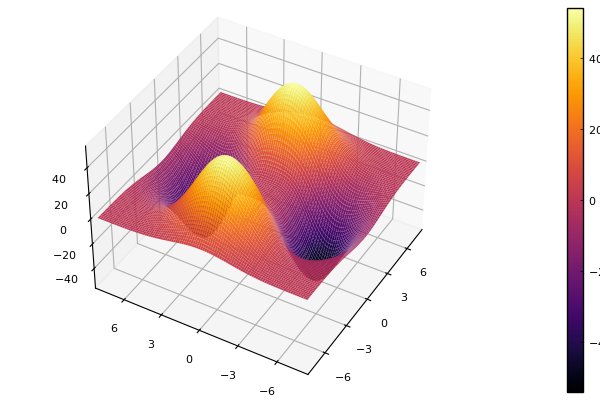

In [5]:
using Plots
pyplot()
x1 = LinRange(-8,8,101); x2 = LinRange(-8,8,101);
f(x1,x2) = (x1^4 - x2^4) * exp(0.1*(-x1^2-x2^2))
plot(x1,x2,f,st=:surface,camera=(-60,40))

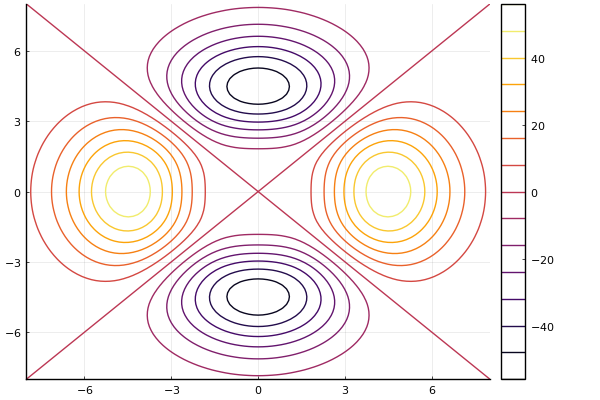

In [6]:
using Plots
pyplot()
x1 = LinRange(-8,8,101); x2 = LinRange(-8,8,101);
f(x1,x2) = (x1^4 - x2^4) * exp(0.1*(-x1^2-x2^2))
#plot(x1,x2,f,st=:surface,camera=(-30,60))
plot(x1,x2,f,st=:contour,camera=(-30,60))

In [2]:
function f2(x) # f(x) = (x1^2 - x2^4) exp(-0.1(x1^2+x2^2))
    return (x[1]^4 - x[2]^4) * exp(0.1*(-x[1]^2-x[2]^2))
end

f2 (generic function with 1 method)

In [6]:
x0 = [0; 3.5]; # initial guess
α = .99; # step size
delta = 1e-9; # set a convergence threshold
# set a max iteration so we don't get stuck in the loop forever!
MAX_ITER = 100; 
N = 1; # counter for iteration
x = x0; # root variable
myfunc = f2;
while N < MAX_ITER
    g = ForwardDiff.gradient(myfunc, x); # evaluate gradient at current guess
    H = ForwardDiff.hessian(myfunc, x); # evaluate Hessian matrix at current guess
    detH = det(H);
    if abs(det(H)) < delta
            println(" Insufficient information to proceed. Newton-Raphson method did not converge; Hessian is singular.")
            break
    end
    if norm(g) < delta
        if abs(det(H)) > delta
            if all(sign.(eigen(H).values) .> 0)
                println("Converged to a local minimum at iteration: N = ", N)
            elseif all(sign.(eigen(H).values) .< 0) 
                println("Converged to a local maximum at iteration: N = ", N)
            else
                println("Converged to a saddle point at iteration: N = ", N)
            end
        end
        break
    else
        dx = -H \ g; # solve the linear system
        x += α * dx; # x_{k+1} = x_k - step * H^{-1} * grad
    end
    # print the output at each iteration
    println("f(x): ", round(myfunc(x),digits=10), "\t norm(grad): ", round(norm(g),digits=10))
    println("N: ", N, "\t\t x: ", round.(x,digits=10))
    println("--------------------------------------------")
    N += 1;
end

println("f(x): ", myfunc(x), "   norm(grad): ", norm(ForwardDiff.gradient(myfunc, x)), "   x: ", x)

f(x): -52.821445282	 norm(grad): 19.5220351721
N: 1		 x: [0.0, 4.8269302038]
--------------------------------------------
f(x): -54.1252392634	 norm(grad): 7.2207974953
N: 2		 x: [0.0, 4.4435361457]
--------------------------------------------
f(x): -54.1341118294	 norm(grad): 0.6211812422
N: 3		 x: [0.0, 4.4717680779]
--------------------------------------------
f(x): -54.1341132945	 norm(grad): 0.0079662077
N: 4		 x: [0.0, 4.4721322613]
--------------------------------------------
f(x): -54.1341132946	 norm(grad): 7.99828e-5
N: 5		 x: [0.0, 4.4721359181]
--------------------------------------------
f(x): -54.1341132946	 norm(grad): 7.999e-7
N: 6		 x: [0.0, 4.4721359546]
--------------------------------------------
f(x): -54.1341132946	 norm(grad): 8.0e-9
N: 7		 x: [0.0, 4.472135955]
--------------------------------------------
Converged to a local minimum at iteration: N = 8
f(x): -54.134113294645054   norm(grad): 8.000000661922968e-11   x: [0.0, 4.472135954995885]
